In [15]:
#This program generates FIG.3D 
#Propagation order of the signal elicited by layer 4 excitatory cell stimulation. 
#This is obtained avareging the times rise of 10 different simulations.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [17]:
#Importing some info I need for this program
runtime=np.loadtxt("general_files/runtime.txt")*1000 #Runtime of the simulations

#Number of neurons for each type in each of the 4 layers
N= (np.loadtxt("general_files/N.txt").reshape(4, 4)).astype(int)
Ntot=5000
#In layer 1: 
N1=int(0.0192574218*Ntot)
#print(N1)

print("The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1")
print("Total number of neurons in the column: %s + %s \n85 perc excitatory and 15 perc inhibitory \nIn each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   "%(Ntot,N1))
print("Number of neurons for each type in each of the 4 layers:")
print(N)
print("The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6")

The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1
Total number of neurons in the column: 5000 + 96 
85 perc excitatory and 15 perc inhibitory 
In each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   
Number of neurons for each type in each of the 4 layers:
[[1236   65   47  107]
 [1010   98   53   27]
 [ 741   63   56   11]
 [1263  102  102   19]]
The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6


In [18]:
#Comput the rates from the spike data 
def rates(data,iniz,fin,window,step_size):
    spikes=0
    time=iniz*1000
    all_time=fin*1000
    rates=[]
    sort_data=np.sort(data)

    while time <= all_time-window:
        for i in range(0,len(data)):
                if time <sort_data[i]< time+window:
                    spikes+=1
                elif sort_data[i]>= time+window:
                    break
        rates.append(spikes/window)
        time+=step_size
        spikes=0
    return rates 

In [19]:
#Compute when the curve reaches the maximum
def compute_max(a):
    range_array= a[500:800]
    #print(range_array)
    max_value = max(range_array)
    min_value= min(range_array)
    max_index = range_array.index(max_value)
    #print("max_index")
    #print(max_index)
#     mean= (max_value+min_value)/2
#     index_mean = np.argmin(np.abs(np.array(range_array)-mean))
#     print(index_mean)
    
    #half=max_value/2
    #index_half = np.argmin(np.abs(np.array(range_array)-half))
    #print(index_half)
    #print("----------")
    return max_index

In [20]:
#Compute when the curve reaches the half of the maximum
def compute(a):
    range_array= a[500:800]
    #print(range_array)
    max_value = max(range_array)
    min_value= min(range_array)
    max_index = range_array.index(max_value)
    #print("max_index")
    #print(max_index)
    mean= (max_value+min_value)/2
    index_mean = np.argmin(np.abs(np.array(range_array)-mean))
    #print("mean_index")
    #print(index_mean)
    #print('---------------')
    #half=max_value/2
    #index_half = np.argmin(np.abs(np.array(range_array)-half))
    #print(index_half)
    return index_mean

In [21]:
# The following takes some time to run, I already saved the values below, 
# if you want to recompute uncomment the following 

In [22]:
#ARRAYS CONTAINING THE VALUES
# t_e23m_all=[]
# t_e4m_all=[]
# t_e5m_all=[]
# t_e6m_all=[]
    
# t_pv23m_all=[]
# t_pv4m_all=[]
# t_pv5m_all=[]
# t_pv6m_all=[]

# t_sst23m_all=[]
# t_sst4m_all=[]
# t_sst5m_all=[]
# t_sst6m_all=[]

# t_vip23m_all=[]
# t_vip4m_all=[]
# t_vip5m_all=[]
# t_vip6m_all=[]

# t_e23_all=[]
# t_e4_all=[]
# t_e5_all=[]
# t_e6_all=[]
    
# t_pv23_all=[]
# t_pv4_all=[]
# t_pv5_all=[]
# t_pv6_all=[]

# t_sst23_all=[]
# t_sst4_all=[]
# t_sst5_all=[]
# t_sst6_all=[]

# t_vip23_all=[]
# t_vip4_all=[]
# t_vip5_all=[]
# t_vip6_all=[]

# #For 10 simulations I upload the files
# for i in ['i1','i2','i3','i4','i5','i6','i7','i8','i9','i10']:
#     a='simulations_data/Inpute4_700ms_runs/'+i+'/Sp_1' #Choose the folder
# #Upload the spikes files
# #layer1
#     S_vip1i=np.array(np.loadtxt(a+'/S_vip1i.txt') )
#     S_vip1t=np.array(np.loadtxt(a+'/S_vip1t.txt') )*1000

#     #layer23
#     S_e23i=np.array(np.loadtxt(a+'/S_e23i.txt') )
#     S_e23t=np.array(np.loadtxt(a+'/S_e23t.txt') )*1000

#     S_pv23i=np.array(np.loadtxt(a+'/S_pv23i.txt') )
#     S_pv23t=np.array(np.loadtxt(a+'/S_pv23t.txt') )*1000

#     S_sst23i=np.array(np.loadtxt(a+'/S_sst23i.txt') )
#     S_sst23t=np.array(np.loadtxt(a+'/S_sst23t.txt') )*1000

#     S_vip23i=np.array(np.loadtxt(a+'/S_vip23i.txt') )
#     S_vip23t=np.array(np.loadtxt(a+'/S_vip23t.txt') )*1000

#     #layer4
#     S_e4i=np.array(np.loadtxt(a+'/S_e4i.txt') )
#     S_e4t=np.array(np.loadtxt(a+'/S_e4t.txt') )*1000

#     S_pv4i=np.array(np.loadtxt(a+'/S_pv4i.txt') )
#     S_pv4t=np.array(np.loadtxt(a+'/S_pv4t.txt') )*1000

#     S_sst4i=np.array(np.loadtxt(a+'/S_sst4i.txt') )
#     S_sst4t=np.array(np.loadtxt(a+'/S_sst4t.txt') )*1000

#     S_vip4i=np.array(np.loadtxt(a+'/S_vip4i.txt') )
#     S_vip4t=np.array(np.loadtxt(a+'/S_vip4t.txt') )*1000

#     #layer5
#     S_e5i=np.array(np.loadtxt(a+'/S_e5i.txt') )
#     S_e5t=np.array(np.loadtxt(a+'/S_e5t.txt') )*1000

#     S_pv5i=np.array(np.loadtxt(a+'/S_pv5i.txt') )
#     S_pv5t=np.array(np.loadtxt(a+'/S_pv5t.txt') )*1000

#     S_sst5i=np.array(np.loadtxt(a+'/S_sst5i.txt') )
#     S_sst5t=np.array(np.loadtxt(a+'/S_sst5t.txt') )*1000

#     S_vip5i=np.array(np.loadtxt(a+'/S_vip5i.txt') )
#     S_vip5t=np.array(np.loadtxt(a+'/S_vip5t.txt') )*1000

#     #layer6
#     S_e6i=np.array(np.loadtxt(a+'/S_e6i.txt') )
#     S_e6t=np.array(np.loadtxt(a+'/S_e6t.txt') )*1000

#     S_pv6i=np.array(np.loadtxt(a+'/S_pv6i.txt') )
#     S_pv6t=np.array(np.loadtxt(a+'/S_pv6t.txt') )*1000

#     S_sst6i=np.array(np.loadtxt(a+'/S_sst6i.txt') )
#     S_sst6t=np.array(np.loadtxt(a+'/S_sst6t.txt') )*1000

#     S_vip6i=np.array(np.loadtxt(a+'/S_vip6i.txt') )
#     S_vip6t=np.array(np.loadtxt(a+'/S_vip6t.txt') )*1000

#     iniz=0
#     fin=3
#     window=200
#     step=1

#     r_vip1= rates(S_vip1t,iniz,fin,window,step)
#     r_e23=rates(S_e23t,iniz,fin,window,step)
#     r_pv23=rates(S_pv23t,iniz,fin,window,step)
#     r_sst23=rates(S_sst23t,iniz,fin,window,step)
#     r_vip23=rates(S_vip23t,iniz,fin,window,step)

#     r_e4=rates(S_e4t,iniz,fin,window,step)
#     r_pv4=rates(S_pv4t,iniz,fin,window,step)
#     r_sst4=rates(S_sst4t,iniz,fin,window,step)
#     r_vip4=rates(S_vip4t,iniz,fin,window,step)

#     r_e5=rates(S_e5t,iniz,fin,window,step)
#     r_pv5=rates(S_pv5t,iniz,fin,window,step)
#     r_sst5=rates(S_sst5t,iniz,fin,window,step)
#     r_vip5=rates(S_vip5t,iniz,fin,window,step)

#     r_e6=rates(S_e6t,iniz,fin,window,step)
#     r_pv6=rates(S_pv6t,iniz,fin,window,step)
#     r_sst6=rates(S_sst6t,iniz,fin,window,step)
#     r_vip6=rates(S_vip6t,iniz,fin,window,step)
    
#     #Compute the time when the maximum of the firing rate trace is reached 
    
#     #Maxes
#     prev_time=500
#     t_e4m=(compute_max(r_e4)+prev_time)
#     t_e23m=(compute_max(r_e23)+prev_time)
#     t_e5m=(compute_max(r_e5)+prev_time)
#     t_e6m=(compute_max(r_e6)+prev_time)
    
#     t_pv4m=(compute_max(r_pv4)+prev_time)
#     t_pv23m=(compute_max(r_pv23)+prev_time)
#     t_pv5m=(compute_max(r_pv5)+prev_time)
#     t_pv6m=(compute_max(r_pv6)+prev_time)

#     t_sst4m=(compute_max(r_sst4)+prev_time)
#     t_sst23m=(compute_max(r_sst23)+prev_time)
#     t_sst5m=(compute_max(r_sst5)+prev_time)
#     t_sst6m=(compute_max(r_sst6)+prev_time)

#     t_vip4m=(compute_max(r_vip4)+prev_time)
#     t_vip23m=(compute_max(r_vip23)+prev_time)
#     t_vip5m=(compute_max(r_vip5)+prev_time)
#     t_vip6m=(compute_max(r_vip6)+prev_time)
    
#     print(t_e4m)
#     print(t_e23m)
#     print(t_e5m)
#     print(t_e6m)
    
#     print(t_pv4m)
#     print(t_pv23m)
#     print(t_pv5m)
#     print(t_pv6m)
    
    
#     print(t_sst4m)
#     print(t_sst23m)
#     print(t_sst5m)
#     print(t_sst6m)
    
#     print(t_vip4m)
#     print(t_vip23m)
#     print(t_vip5m)
#     print(t_vip6m)
    
#     t_e23m_all.append(t_e23m)
#     t_e4m_all.append(t_e4m)
#     t_e5m_all.append(t_e5m)
#     t_e6m_all.append(t_e6m)
    
#     t_pv23m_all.append(t_pv23m)
#     t_pv4m_all.append(t_pv4m)
#     t_pv5m_all.append(t_pv5m)
#     t_pv6m_all.append(t_pv6m)
    
#     t_sst23m_all.append(t_sst23m)
#     t_sst4m_all.append(t_sst4m)
#     t_sst5m_all.append(t_sst5m)
#     t_sst6m_all.append(t_sst6m)
    
#     t_vip23m_all.append(t_vip23m)
#     t_vip4m_all.append(t_vip4m)
#     t_vip5m_all.append(t_vip5m)
#     t_vip6m_all.append(t_vip6m)
    
#     #Compute the time when half of the maximum of the firing rate trace is reached 

#     print('-----NOW half curve ------')
    
#     #Half time rise
#     t_e4=(compute(r_e4)+prev_time)
#     t_e23=(compute(r_e23)+prev_time)
#     t_e5=(compute(r_e5)+prev_time)
#     t_e6=(compute(r_e6)+prev_time)
    
#     t_pv4=(compute(r_pv4)+prev_time)
#     t_pv23=(compute(r_pv23)+prev_time)
#     t_pv5=(compute(r_pv5)+prev_time)
#     t_pv6=(compute(r_pv6)+prev_time)

#     t_sst4=(compute(r_sst4)+prev_time)
#     t_sst23=(compute(r_sst23)+prev_time)
#     t_sst5=(compute(r_sst5)+prev_time)
#     t_sst6=(compute(r_sst6)+prev_time)

#     t_vip4=(compute(r_vip4)+prev_time)
#     t_vip23=(compute(r_vip23)+prev_time)
#     t_vip5=(compute(r_vip5)+prev_time)
#     t_vip6=(compute(r_vip6)+prev_time)
    
#     print(t_e4)
#     print(t_e23)
#     print(t_e5)
#     print(t_e6)
    
#     print(t_pv4)
#     print(t_pv23)
#     print(t_pv5)
#     print(t_pv6)
    
#     print(t_sst4)
#     print(t_sst23)
#     print(t_sst5)
#     print(t_sst6)
    
#     print(t_vip4)
#     print(t_vip23)
#     print(t_vip5)
#     print(t_vip6)
    
#     #I put them in an array for the 10 simulations
#     t_e23_all.append(t_e23)
#     t_e4_all.append(t_e4)
#     t_e5_all.append(t_e5)
#     t_e6_all.append(t_e6)
    
#     t_pv23_all.append(t_pv23)
#     t_pv4_all.append(t_pv4)
#     t_pv5_all.append(t_pv5)
#     t_pv6_all.append(t_pv6)
    
#     t_sst23_all.append(t_sst23)
#     t_sst4_all.append(t_sst4)
#     t_sst5_all.append(t_sst5)
#     t_sst6_all.append(t_sst6)
    
#     t_vip23_all.append(t_vip23)
#     t_vip4_all.append(t_vip4)
#     t_vip5_all.append(t_vip5)
#     t_vip6_all.append(t_vip6)
    
#     print('-----------NEW RUN------------')
#     print('-----------##################------------')

In [23]:
#COMPUTE THE MEAN OF 10 RUNS and print the values

In [24]:
# t_e23=np.mean(t_e23_all)
# t_e4=np.mean(t_e4_all)
# t_e5=np.mean(t_e5_all)
# t_e6=np.mean(t_e6_all)

# t_pv23=np.mean(t_pv23_all)
# t_pv4=np.mean(t_pv4_all)
# t_pv5=np.mean(t_pv5_all)
# t_pv6=np.mean(t_pv6_all)

# t_sst23=np.mean(t_sst23_all)
# t_sst4=np.mean(t_sst4_all)
# t_sst5=np.mean(t_sst5_all)
# t_sst6=np.mean(t_sst6_all)

# t_vip23=np.mean(t_vip23_all)
# t_vip4=np.mean(t_vip4_all)
# t_vip5=np.mean(t_vip5_all)
# t_vip6=np.mean(t_vip6_all)

# # Create a list of variable names
# variable_names = [
#     "t_e23", "t_e4", "t_e5", "t_e6",
#     "t_pv23", "t_pv4", "t_pv5", "t_pv6",
#     "t_sst23", "t_sst4", "t_sst5", "t_sst6",
#     "t_vip23", "t_vip4", "t_vip5", "t_vip6"
# ]

# # Iterate through the list and print each variable
# for var_name in variable_names:
#     var_value = locals()[var_name]  # Get the value of the variable by name
#     print(f"{var_name}: {var_value}")

In [25]:
#This is what I previously computed (in the 2 cells above)

In [26]:
#Half time rise of the firing rate traces
t_e23 = 611.1
t_e4 = 605.9
t_e5 = 631.0
t_e6 = 646.3

t_pv23 = 626.2
t_pv4 = 641.4
t_pv5 = 645.3
t_pv6 = 673.4

t_sst23 = 638.5
t_sst4 = 551.3
t_sst5 = 633.5
t_sst6 = 543.2

t_vip23 = 631.7
t_vip4 = 636.8
t_vip5 = 648.7
t_vip6 = 592.5

In [27]:
#Create the plot

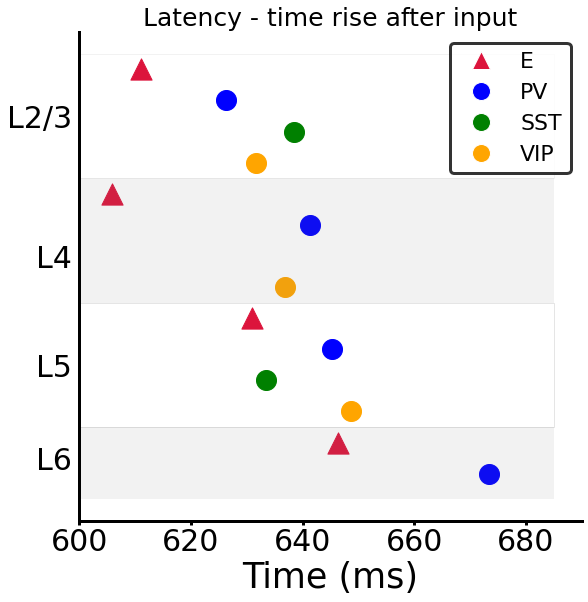

In [28]:
times_e=[
t_e6,
t_e5,
t_e23,
t_e4
#t_vip1
]

#Data to plot
times_rise=[
#t_vip6,
#t_sst6,
t_pv6,
t_e6,
    
t_vip5,
t_sst5,
t_pv5,
t_e5,
    

t_vip4,
t_sst4,
t_pv4,
t_e4,
    

t_vip23,
t_sst23,
t_pv23,
t_e23,
#t_vip1
]
fig,ax = plt.subplots(figsize =(9, 9))

# labels=['vip6', 'sst6',
#                     'pv6', 'e6','vip5', 'sst5',
#                     'pv5', 'e5','vip4', 'sst4',
#                     'pv4', 'e4','vip23', 'sst23',
#                     'pv23', 'e23','vip1']

labels1=[
                    'pv6', 'e6','vip5', 'sst5',
                    'pv5', 'e5','vip4', 'sst4',
                    'pv4', 'e4','vip23', 'sst23',
                    'pv23', 'e23']

colors1 = ['royalblue', 'crimson','orange','green', 'royalblue', 'crimson','orange','green', 'royalblue', 'crimson','orange','green', 'royalblue', 'crimson']
sizes=[400,450,200,200,200,400,200,200,200,400,200,200,200,400]
markers=['o','^','o','o','o','^','o','o','o','^','o','o','o','^']
y_pos = np.arange(len(labels1))

#Plot data 
plt.scatter(t_pv6,0,color='blue',s=sizes[0],marker='o')
plt.scatter(t_e6,1,color='crimson',s=sizes[1],marker='^')

plt.scatter(t_vip5,2,color='orange',s=sizes[0],marker='o')
plt.scatter(t_sst5,3,color='green',s=sizes[0],marker='o')
plt.scatter(t_pv5,4,color='blue',s=sizes[0],marker='o')
plt.scatter(t_e5,5,color='crimson',s=sizes[1],marker='^')

plt.scatter(t_vip4,6,color='orange',s=sizes[0],marker='o')
#plt.scatter(t_sst4,7,color='green',s=sizes[0],marker='o')
plt.scatter(t_pv4,8,color='blue',s=sizes[0],marker='o')
plt.scatter(t_e4,9,color='crimson',s=sizes[1],marker='^')

plt.scatter(t_vip23,10,color='orange',s=sizes[0],marker='o')
plt.scatter(t_sst23,11,color='green',s=sizes[0],marker='o')
plt.scatter(t_pv23,12,color='blue',s=sizes[0],marker='o')
plt.scatter(t_e23,13,color='crimson',s=sizes[1],marker='^')


#boxes for layers
rect6=mpatches.Rectangle((575,-0.8),110,2.3, 
                    #fill = False,
                        alpha=0.1,
                   facecolor="grey",
                    #color = "black",
                    linewidth = 1)

rect5=mpatches.Rectangle((575,1.5),110,4, 
                    fill = False,
                        alpha=0.1,
                   #facecolor="grey",
                    color = "black",
                    linewidth = 1)

rect4=mpatches.Rectangle((575,5.5),110,4, 
                    #fill = False,
                        alpha=0.1,
                   facecolor="grey",
                    #color = "red",
                    linewidth = 1)


rect23=mpatches.Rectangle((575,9.5),110,4, 
                fill = False,
                    alpha=0.1,
               #facecolor="grey",
                color = "grey",
                linewidth = 1)

#Add boxes layers
plt.gca().add_patch(rect6)
plt.gca().add_patch(rect5)
plt.gca().add_patch(rect4)
plt.gca().add_patch(rect23)

#Layout of the plot
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.setp(ax.spines.values(), linewidth=3)

# Create names on the y-axis and specifsc on axis labels size
#y-axis
lab = ('L6', 'L5',
                'L4', 'L2/3')
y_pos = [0.5,3.5,7,11.5]
plt.yticks(y_pos, lab,size=30)
ax.yaxis.set_tick_params(width=3)
#x axis
plt.xticks(size=30)
plt.locator_params(axis='x', nbins=5) #ticks on x axis
ax.xaxis.set_tick_params(width=3)
plt.xlabel('Time (ms)',size=35)
#plt.ylabel('Populations',size=15)
plt.title('Latency - time rise after input',size=25)
plt.xlim(600,690) #set x limits

#Legend customized
legend_elements = [
                   Line2D([0], [0], marker='^', color='w', label='E',
                          markerfacecolor='crimson', markersize=18),
                   Line2D([0], [0], marker='o', color='w', label='PV',
                          markerfacecolor='blue', markersize=18),
                   Line2D([0], [0], marker='o', color='w', label='SST',
                          markerfacecolor='g', markersize=18),
                   Line2D([0], [0], marker='o', color='w', label='VIP',
                          markerfacecolor='orange', markersize=18)]
#call legend
l1=plt.legend(handles=legend_elements,loc='best', fancybox=True,fontsize=22)
l1.get_frame().set_linewidth(3.0)
l1.get_frame().set_edgecolor('k')

ax.tick_params(top=False,
               bottom=True,
               left=False,
               right=False,
               labelleft=True,
               labelbottom=True)

#save fig
plt.savefig('IMAGES/Fig3D_latency.png')
# Show graphic
plt.show()